<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Diamond Price Prediction</p>

author: Muhammad Shafa Praramadhana


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Libraries</p>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import os
import warnings


sns.set(rc = {'axes.facecolor': '#f0efeb', 'figure.facecolor': '#f0efeb', 'figure.figsize':(5, 5)})
palette = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"]
warnings.filterwarnings('ignore')

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Dataset</p>

In [70]:
df = pd.read_csv('diamonds.csv')

In [71]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [72]:
df.shape

(53940, 11)

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">About The Dataset</p>
<br />

|Variables|Explain|
|-------|-------|
|price|price in US dollars (\$326--\$18,823)|
|carat|weight of the diamond (0.2--5.01)|
|cut|quality of the cut (Fair, Good, Very Good, Premium, Ideal)|
|color|diamond colour, from J (worst) to D (best)|
|clarity|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|x|length in mm (0--10.74)|
|y|width in mm (0--58.9)|
|z|depth in mm (0--31.8)|
|depth|total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)|
|table|width of top of diamond relative to widest point (43--95)|

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Exploratory Data Analysis</p>

In [73]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The min value for x, y and z variable is 0, which indicating a null values. I will replace 0 with NaN later.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [75]:
df = df.drop(columns = ['Unnamed: 0'], axis = 1)

It seems that Unnamed variable is just an indexing, we can drop it to reduce the dimensionality of the dataset.

In [76]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [77]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


Theres no null value in the dataset, because currently null values is indicated with 0.

In [78]:
df[['x', 'y', 'z']] = df[['x', 'y', 'z']].replace(0, np.NaN)

Now all 0's on x, y and z variables has been replaced. Let's plot the distribution of those variables.

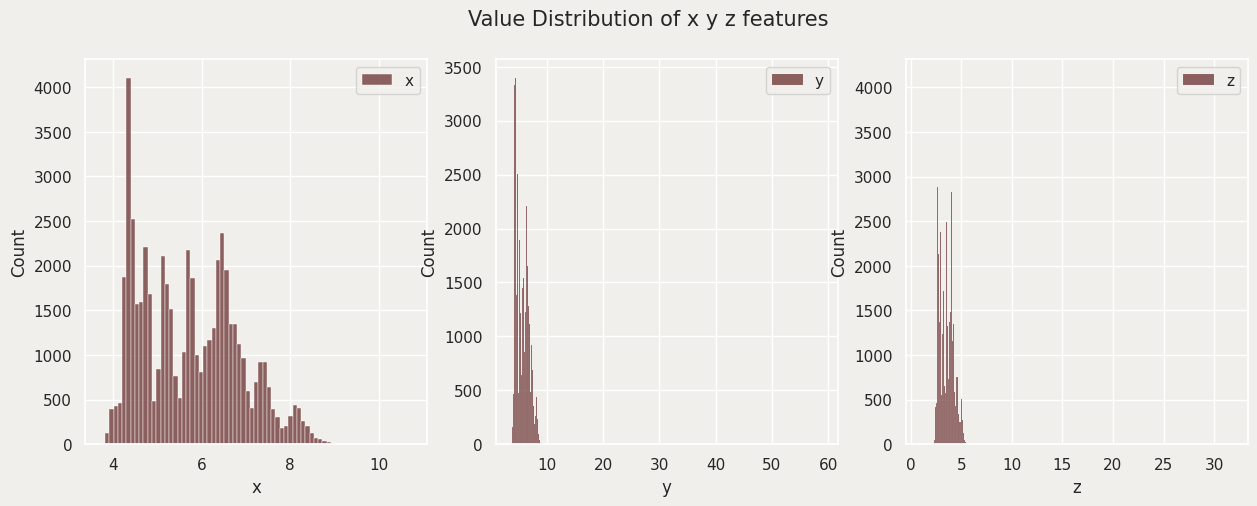

In [79]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, c in enumerate(['x', 'y', 'z']):
  axs = axes.flatten()[i]
  sns.histplot(x = df[c], color = palette[0], label = c, ax = axs)
  axs.legend(loc = 'best')

plt.suptitle('Value Distribution of x y z features', size = 15)
plt.show()

All distribution are skewed (left skewed), so i will replace the null values with the median of each columns.

In [80]:
df['x'].fillna(df['x'].median(), inplace = True)
df['y'].fillna(df['y'].median(), inplace = True)
df['z'].fillna(df['z'].median(), inplace = True)

In [81]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


<Figure size 400x400 with 0 Axes>

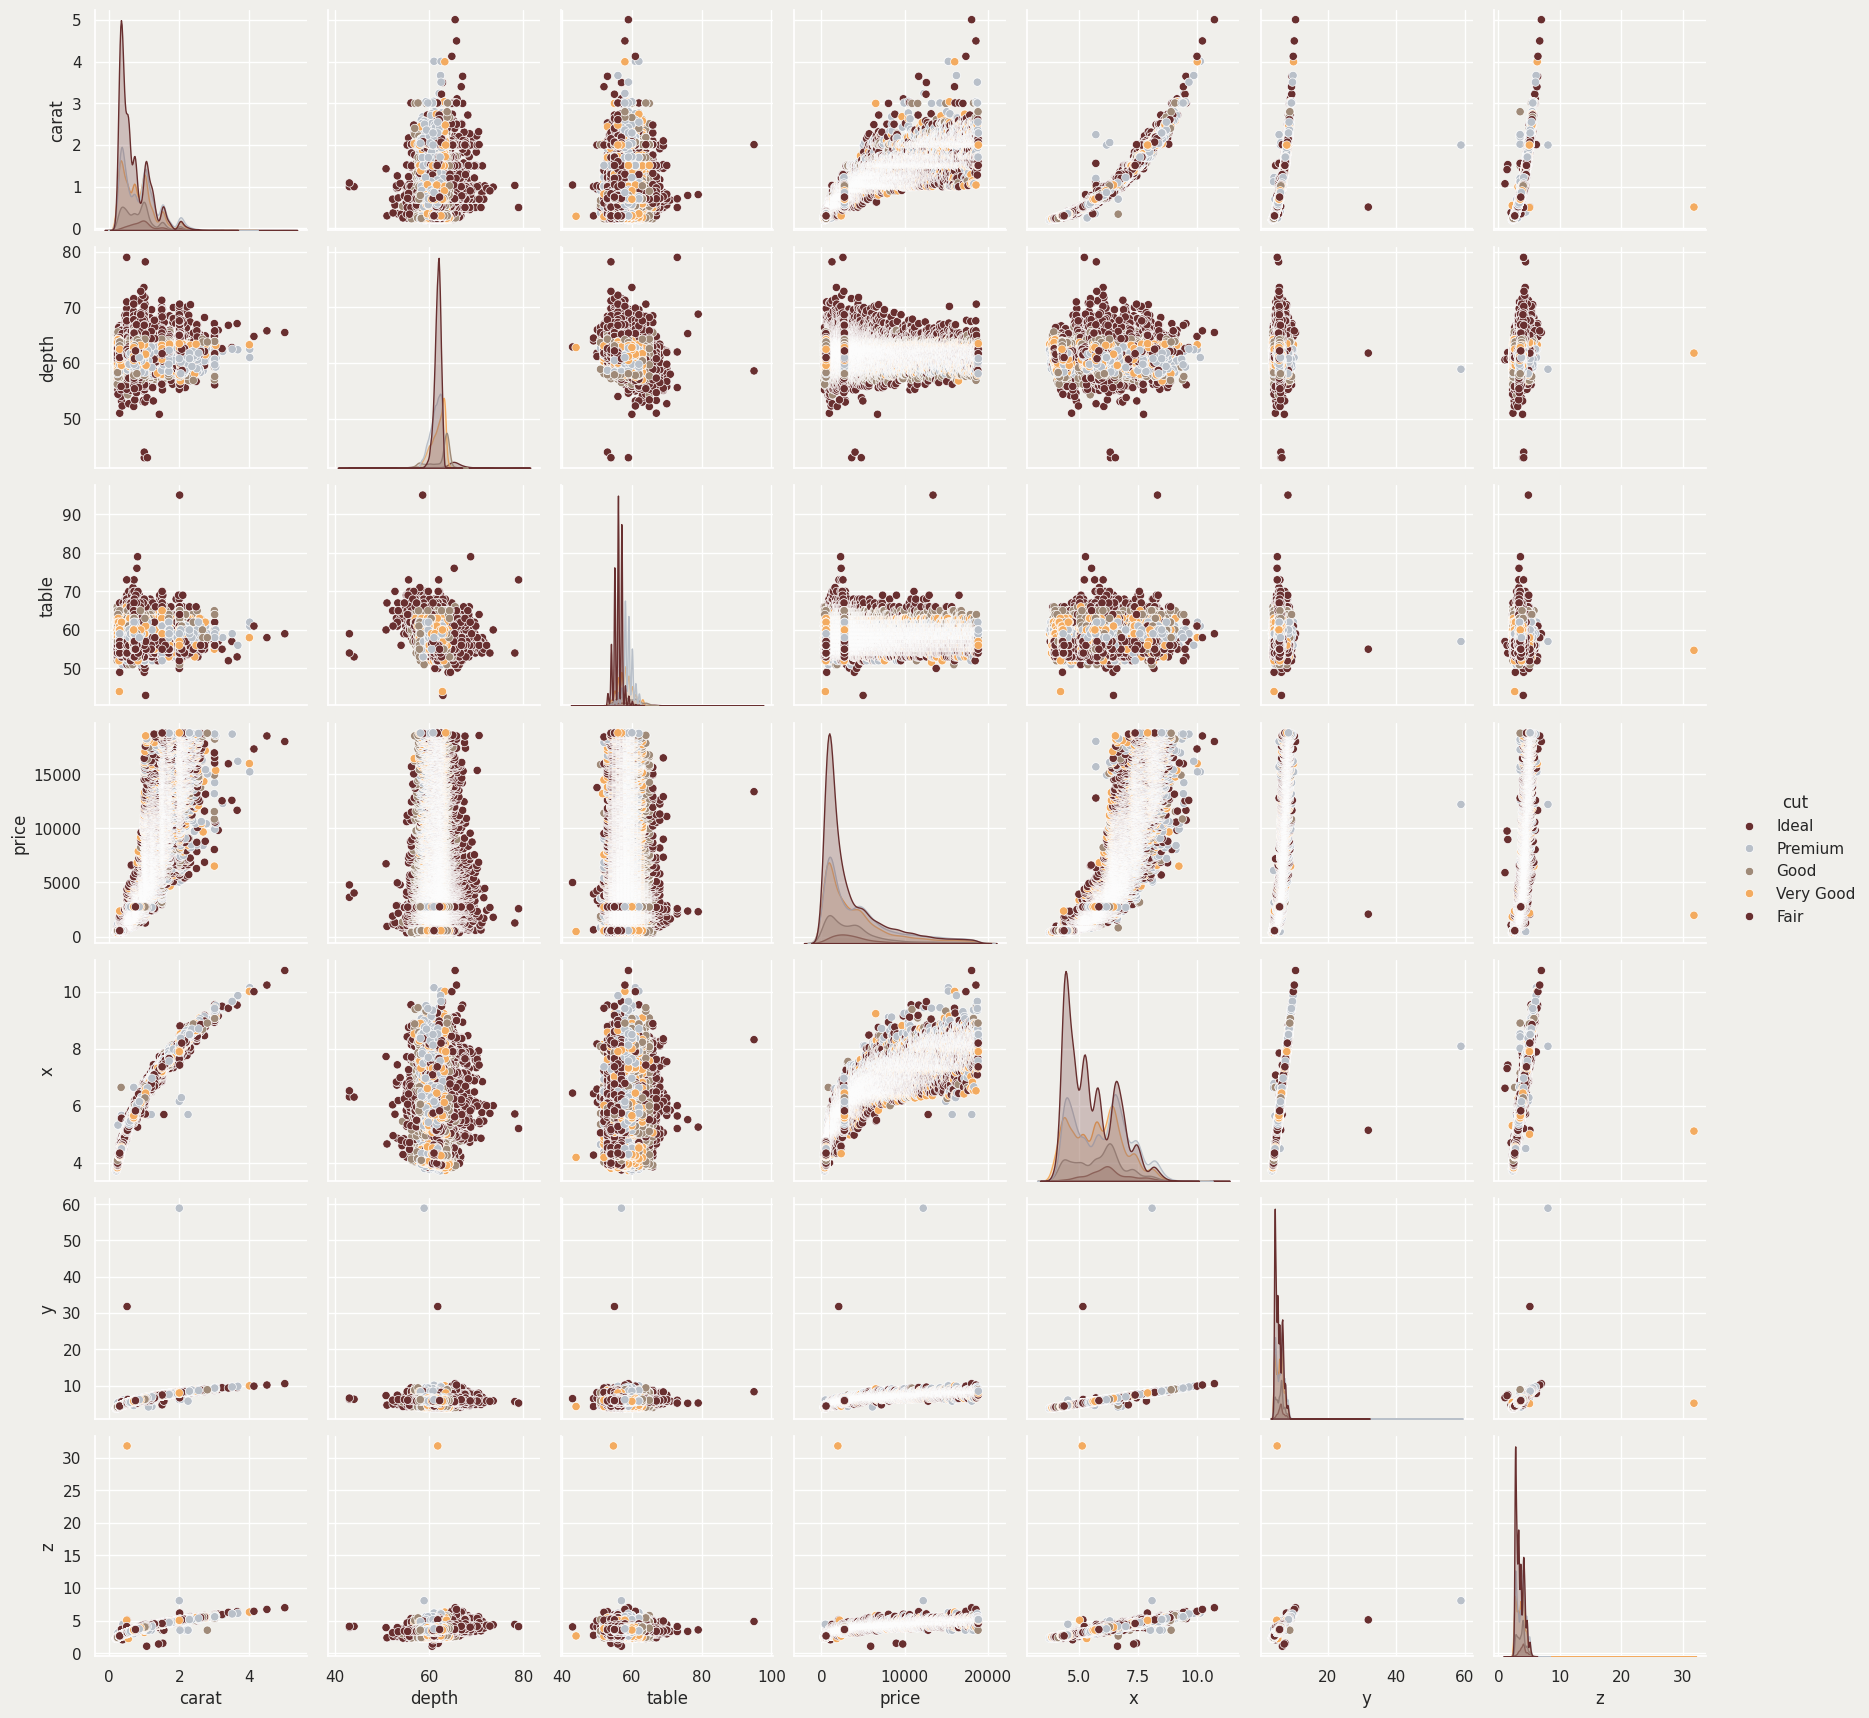

In [82]:
plt.figure(figsize = (4, 4))

sns.pairplot(df, hue = 'cut', palette = palette)

plt.show()

We can see that there is outliers on the variable depth, table, x, y and z. But to make sure i will plot the regresion line.

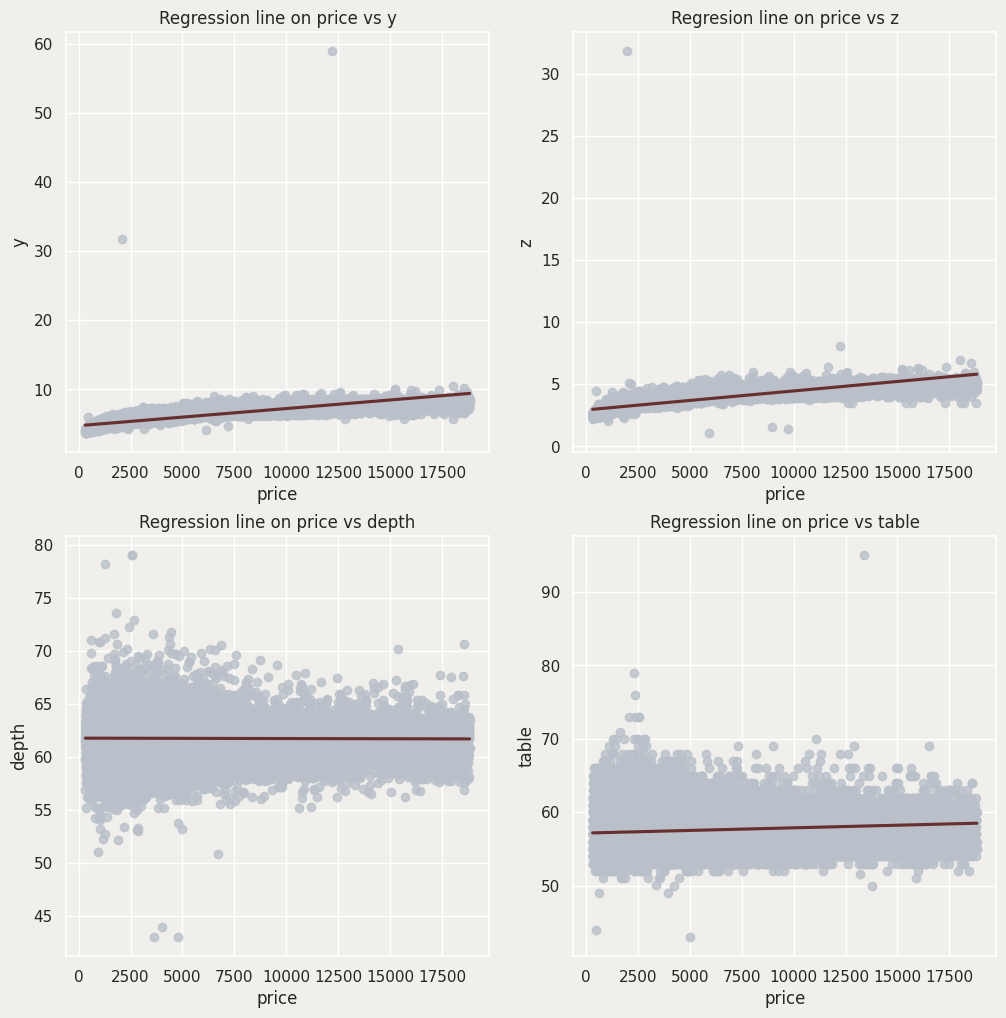

In [83]:
fig, axes = plt.subplots(2, 2, figsize = (12, 12))

sns.regplot(x = 'price', y = 'y', data = df, fit_reg = True, scatter_kws = {"color": "#B9C0C9"}, line_kws = {"color": "#682F2F"}, ax = axes[0, 0])
axes[0, 0].set_title('Regression line on price vs y')

sns.regplot(x = 'price', y = 'z', data = df, fit_reg = True, scatter_kws = {"color": "#B9C0C9"}, line_kws = {"color": "#682F2F"}, ax = axes[0, 1])
axes[0, 1].set_title('Regresion line on price vs z')

sns.regplot(x = 'price', y = 'depth', data = df, fit_reg = True,  scatter_kws = {"color": "#B9C0C9"}, line_kws = {"color": "#682F2F"}, ax = axes[1, 0])
axes[1, 0].set_title('Regression line on price vs depth')

sns.regplot(x = 'price', y = 'table', data = df, fit_reg = True,  scatter_kws = {"color": "#B9C0C9"}, line_kws = {"color": "#682F2F"}, ax = axes[1, 1])
axes[1, 1].set_title('Regression line on price vs table')

plt.show()


Yep, clearly we can see those outliers. Lets filter the outliers.

In [84]:
df = df[df['y'] < 30]
df = df[(df['z'] < 30) & (df['z'] > 2)]
df = df[(df['depth'] < 75) & (df['depth'] > 45)]
df = df[(df['table'] < 80) & (df['depth'] > 40)]

In [85]:
df.shape

(53927, 10)

We lost about 13 datapoints after removing the outliers, but its not even a small problem.

<Figure size 400x400 with 0 Axes>

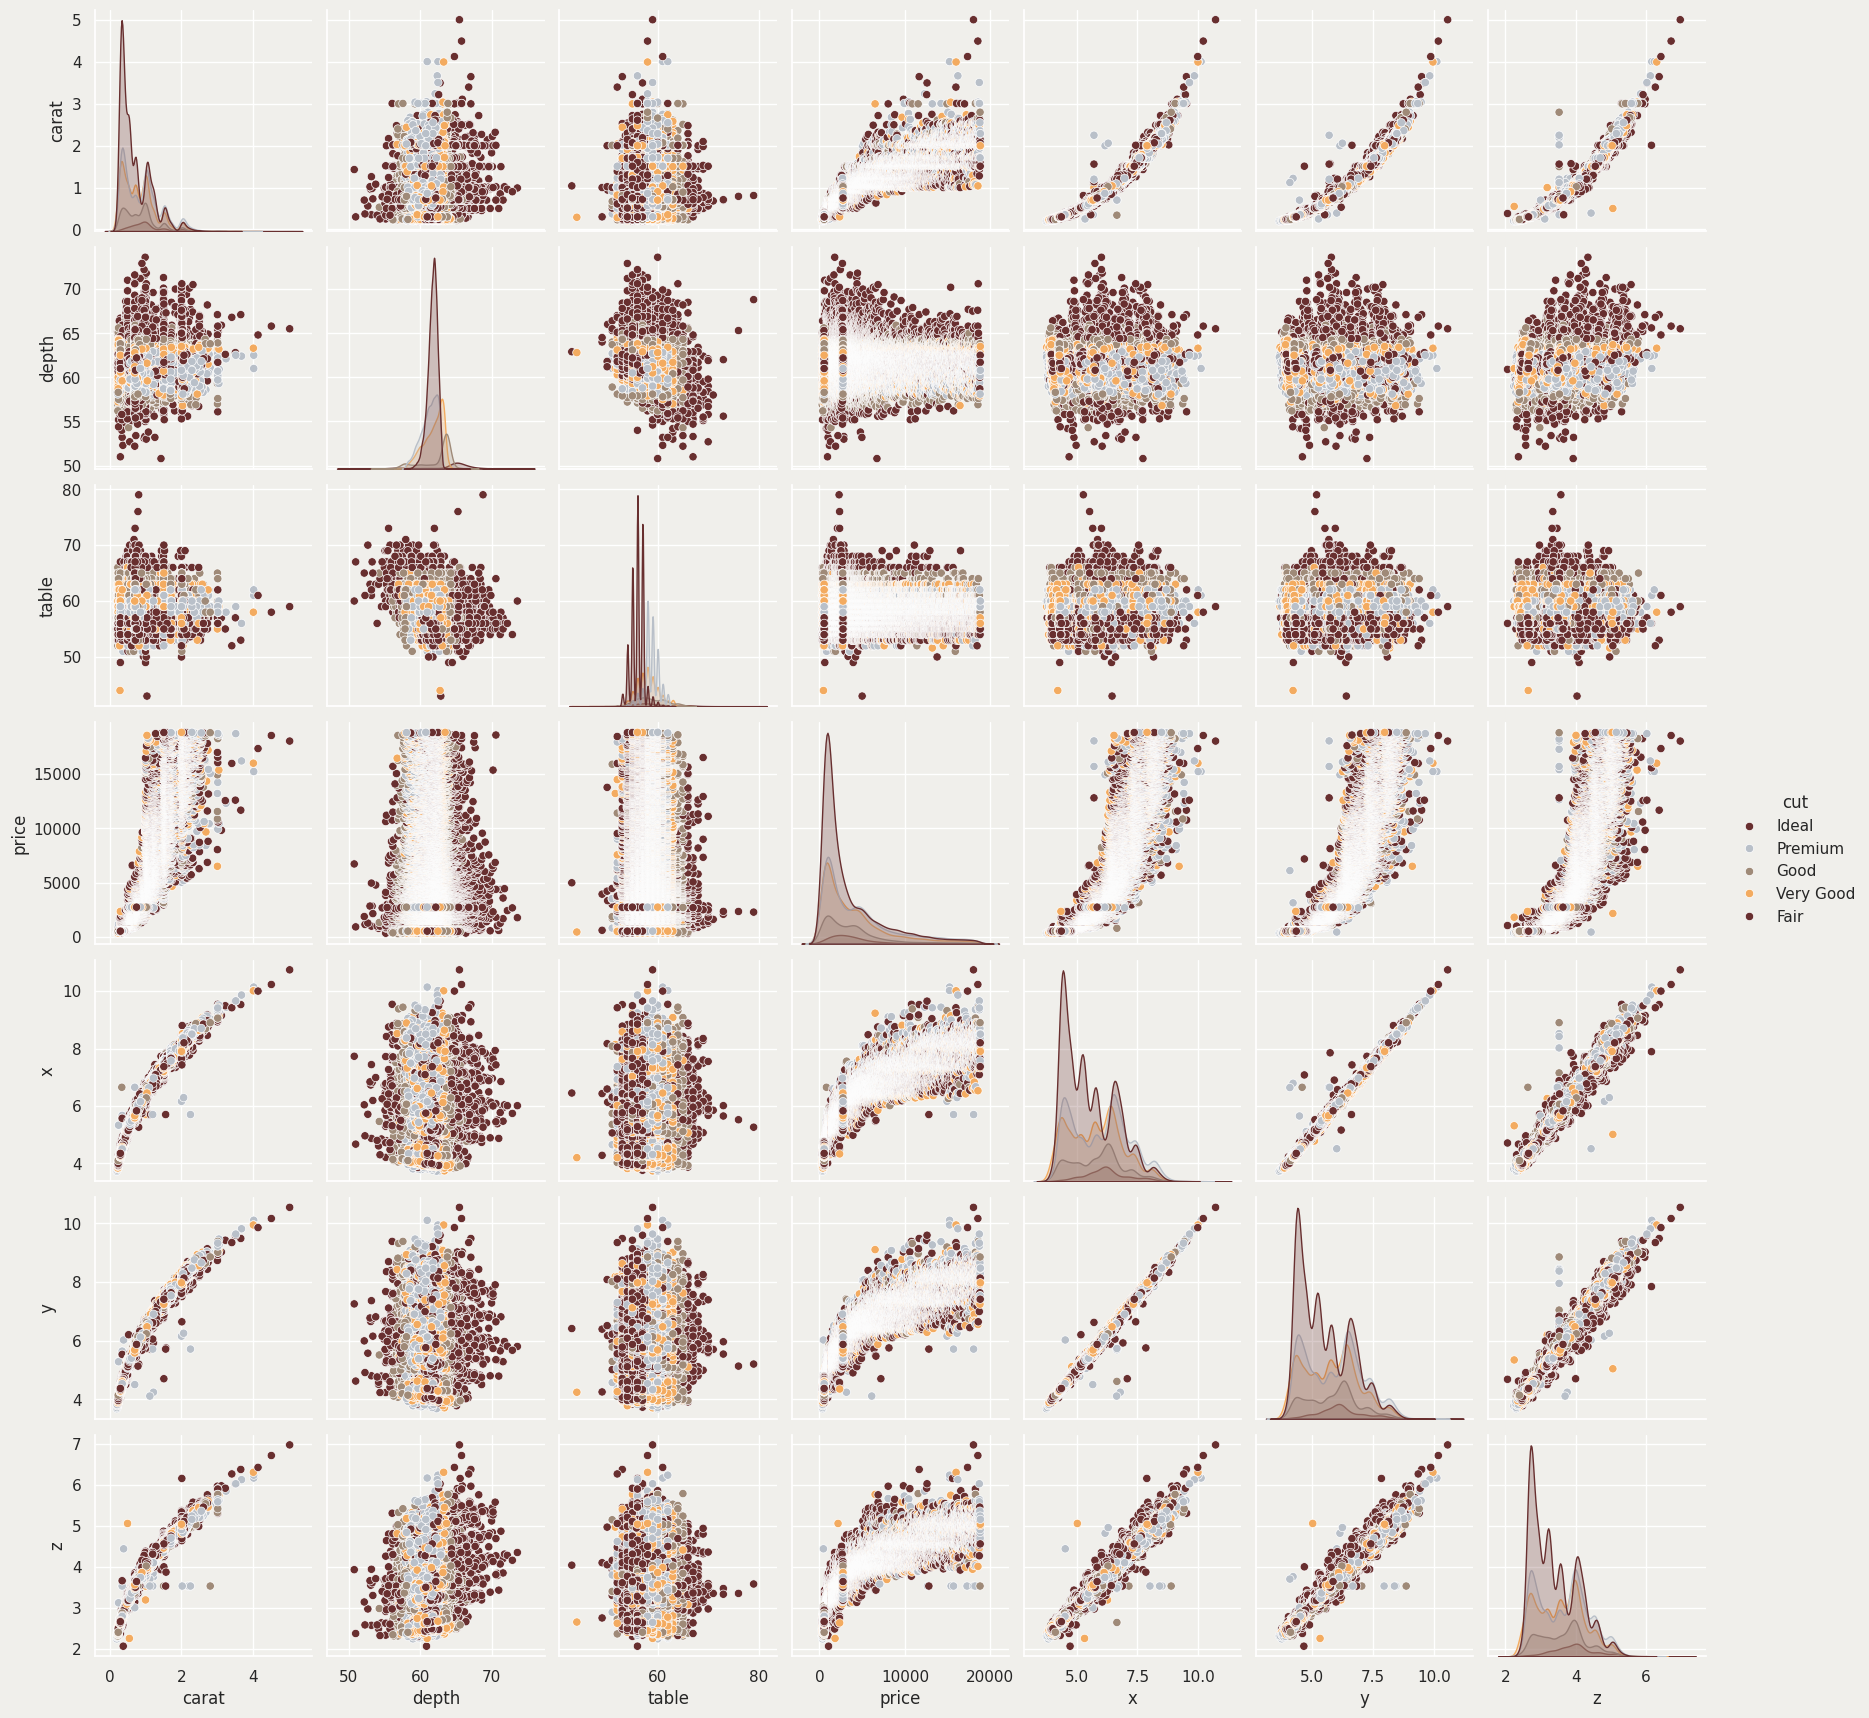

In [86]:
plt.figure(figsize = (4, 4))

sns.pairplot(data = df, hue = 'cut', palette = palette)

plt.show()

The pairplot after removing the outliers seems to be much cleaner.
<br />

Now let's deal with categorical variables.

In [87]:
s = (df.dtypes == 'object')
categorical = list(s[s].index)

In [88]:
print('Categorical variables: ', categorical)

Categorical variables:  ['cut', 'color', 'clarity']


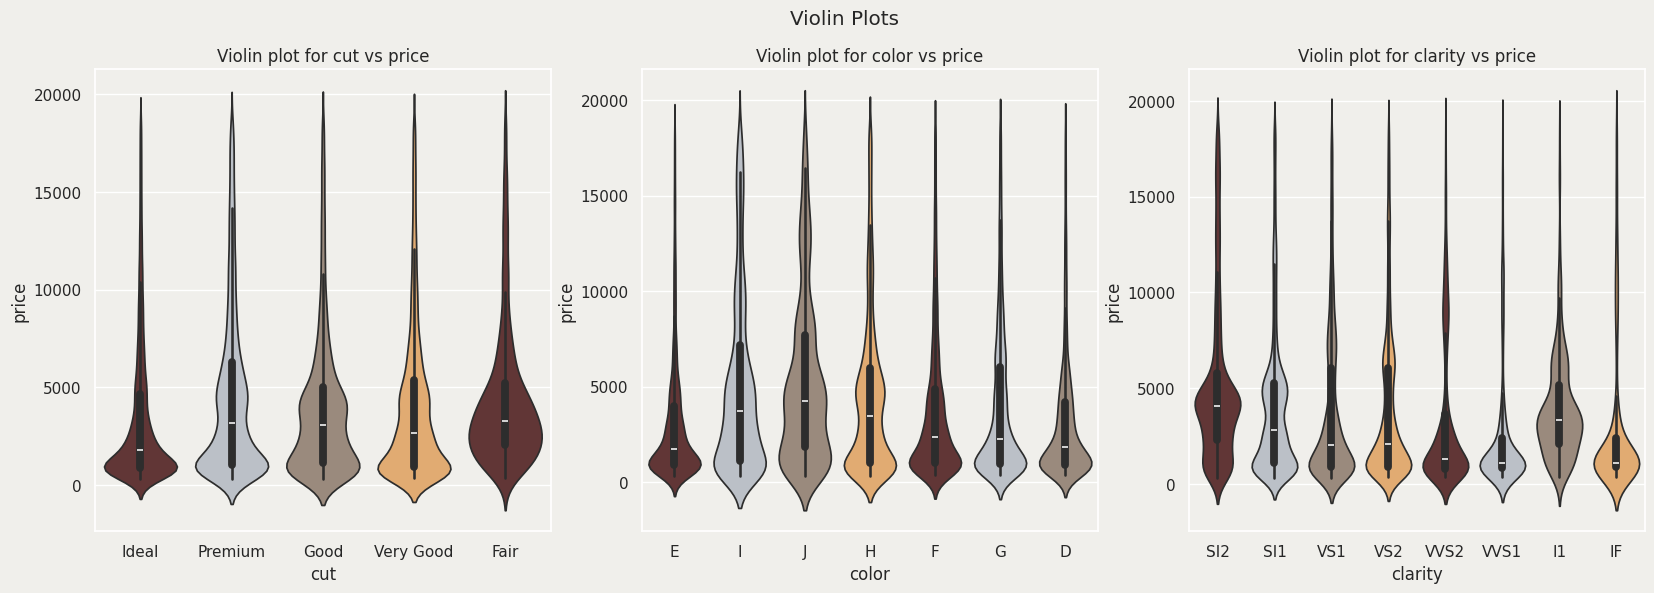

In [89]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

sns.violinplot(x = 'cut', y = 'price', data = df, palette = palette, scale = 'count', ax = axes[0])
axes[0].set_title('Violin plot for cut vs price')
axes[0].set_ylabel('price')
axes[0].set_xlabel('cut')

sns.violinplot(x = 'color', y = 'price', data = df, palette = palette, scale = 'count', ax = axes[1])
axes[1].set_title('Violin plot for color vs price')
axes[1].set_ylabel('price')
axes[1].set_xlabel('color')

sns.violinplot(x = 'clarity', y = 'price', data = df, palette = palette, scale = 'count', ax = axes[2])
axes[2].set_title('Violin plot for clarity vs price')
axes[2].set_ylabel('price')
axes[2].set_xlabel('clarity')

fig.suptitle('Violin Plots')
plt.show()

Lets encode the categorical variables.

In [90]:
from sklearn.preprocessing import LabelEncoder

for var in categorical:
  le = LabelEncoder()
  df[var] = le.fit_transform(df[var])


In [91]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [92]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53927.000000,53927.000000,53927.000000,53927.000000,53927.000000,53927.000000,53927.000000,53927.000000,53927.000000,53927.000000
mean,0.797870,2.553304,2.594192,3.835277,61.749632,57.456298,3932.391548,5.731839,5.733672,3.539437
std,0.473981,1.027444,1.701119,1.724614,1.420417,2.226584,3989.362883,1.119548,1.111406,0.691305
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: >

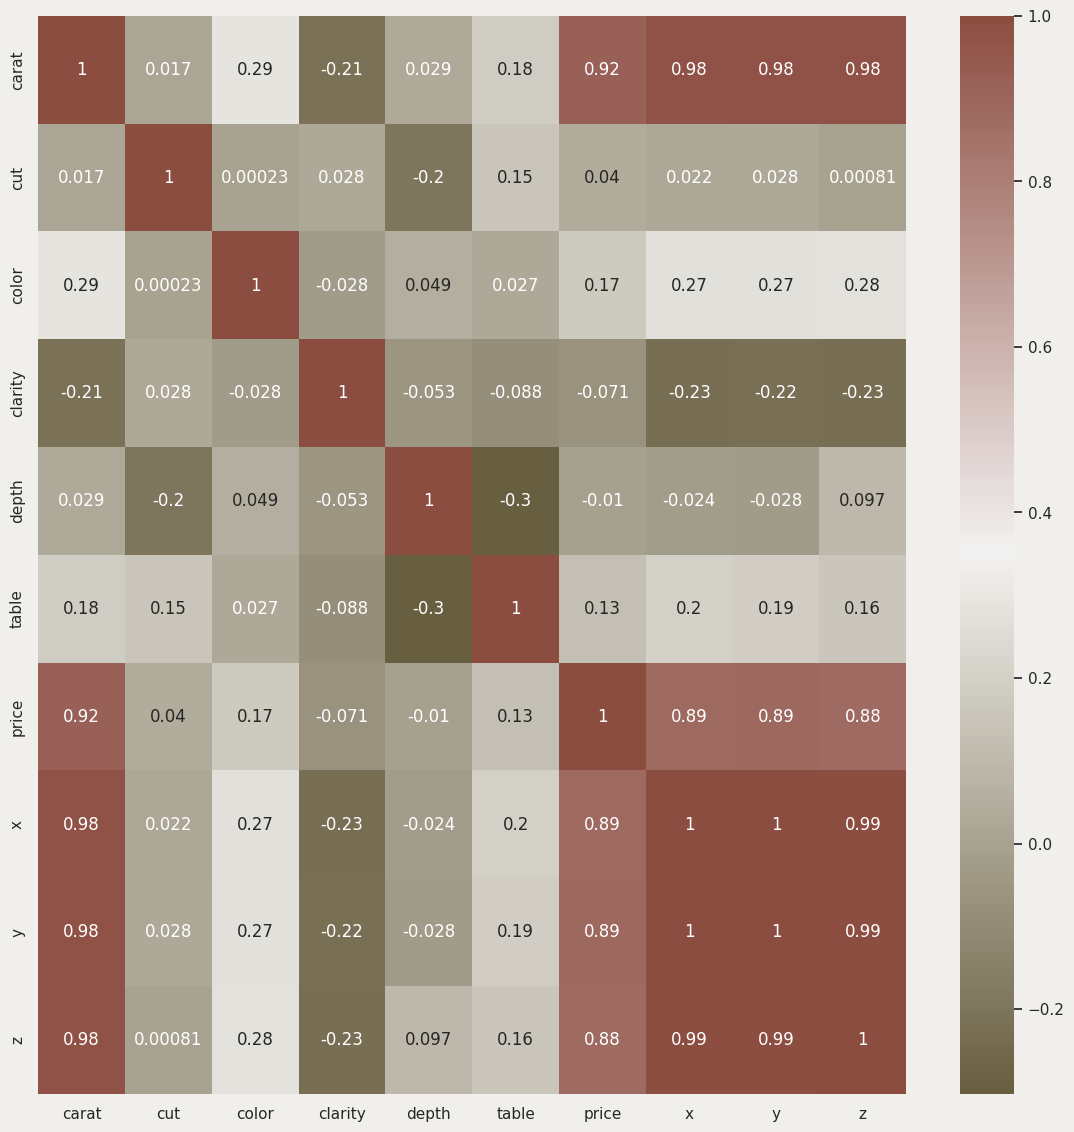

In [93]:
corr = df.corr()

cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)

fig, ax = plt.subplots(figsize = (14, 14))

sns.heatmap(corr, cmap = cmap, annot = True)

From the heatmap above, we can see that:
* x, y and z have the highest correlation with the target variable
* But surprisingly, cut, clarity and depth have the lowest correlation with the target variable. We can consider dropping it, but lets just continue for now.

In [94]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Data Preprocessing</p>

**Split the feature and target variable**

In [95]:
X = df.drop(columns = ['price'], axis = 1)
y = df['price']

**Split the training and testing set**

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Building pipeline of standard scaler and model for various regressor**

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

pipeline_dt = Pipeline([('scalar1', StandardScaler()), ('dt_regressor', DecisionTreeRegressor())])

pipeline_rf = Pipeline([('scalar2', StandardScaler()), ('rf_regressor', RandomForestRegressor())])

pipeline_kn = Pipeline([('scalar3', StandardScaler()), ('kn_regressor', KNeighborsRegressor())])

pipeline_xgb = Pipeline([('scalar4', StandardScaler()), ('xgb_regressor', XGBRegressor())])

pipelines = [pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]
pipe_dict = {0: 'Decisition Tree', 1: 'Random Forest', 2: 'K-Nearest Neighbor', 3: 'XGB Regressor'}

for pipe in pipelines:
  pipe.fit(X_train, y_train)

cv_results = []

for i, model in enumerate(pipelines):
  cv_score = cross_val_score(model, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)
  cv_results.append(cv_score)

  print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Decisition Tree: -745.329629 
Random Forest: -546.575539 
K-Nearest Neighbor: -806.577489 
XGB Regressor: -545.380961 


From the information above, we know that XGB Regressor has the best scoring. Let's test the model on the test set.

In [98]:
y_pred = pipeline_xgb.predict(X_test)

In [99]:
from sklearn.metrics import r2_score, mean_squared_error

print('R-Squared Score: ', r2_score(y_test, y_pred))
print('MSE Score: ', mean_squared_error(y_test, y_pred))

R-Squared Score:  0.9793297041888916
MSE Score:  323701.95140075166
